<a href="https://colab.research.google.com/github/KseniiaL/Coronavirus-exploratory-analysis/blob/master/Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coronavirus in Estonia exploratory analysis
---
You can find a quick overview of the spread of COVID-19 disease in Estonia here in this simple data analysis I've made recently.

First, I need to import the dataset, which is stored at my gDrive. The dataset was downloaded at the Republic of Estonia Ministry of Health website: https://www.terviseamet.ee/et/koroonaviirus/koroonaviiruse-andmestik
(the set was imported in the morning of 2020-04-13)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Create the dataframe

In [0]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("ggplot") 

df = pd.read_csv("gdrive/My Drive/Datasets/opendata_covid19_test_results.csv", index_col="id")
df.drop_duplicates(inplace=True)
df.head()

,Gender,AgeGroup,Country,County,ResultValue,StatisticsDate,ResultTime,AnalysisInsertTime
id,,,,,,,,
95013b64dd5ff18548a92eb5375d9c4a1881467390fed4a1c084253ef72be9ea,M,10-14,Eesti,Tartu maakond,N,2020-03-10,2020-03-06 18:44:00,2020-03-10 16:01:55
71fab95aa66a3976b9d9f2868482192fc2bb77ac07d6808b1b19079e045fe6de,M,5-9,Eesti,Tartu maakond,N,2020-03-10,2020-03-06 13:28:00,2020-03-10 16:05:53
e474cb8d21136013c9c90877592ee8d6b20d1bd72ef48a7a916030211f15833f,M,20-24,Eesti,Harju maakond,N,2020-03-10,2020-03-05 00:00:00,2020-03-10 15:53:52
86a33c6965a464b3c8b754795d99b3fccab5e8349827dc8f3f97afd7a9e86af7,M,35-39,Eesti,Tartu maakond,N,2020-03-10,2020-03-05 00:00:00,2020-03-10 15:50:53
70fb213dfac6252426170b79224d399c6e613fbca07d54b531b777e671f7cb6d,N,15-19,Eesti,Viljandi maakond,N,2020-03-10,2020-03-06 18:46:00,2020-03-10 15:59:21


The description of the columns provided by Terviseamet:
---
**id** - Unique anonymized test identifier. String 40 characters.

**Gender** - The sex of the patient, if known. String 1 character. 
*   M - man
*   N - woman

**AgeGroup** - Patient's age group at the time of the test.
*   0-4
*   5-9
*   10-14
*   15-19
*   ...
*   70-74
*   75-79
*   80- 84
*   over 85 (üle 85)

**Country** - Country of residence according to the patient's population register.
*   Estonia (Eesti)
*   Abroad (Välismaa)
*   Unknown (Tundmatu)

**County** - County of residence in Estonia according to the patient's population register.
*   E.g. Harju County

**ResultValue** - SARS-CoV-2 test result response, string 1 character
*   N - negative
*   P - positive

**StatisticsDate** - Date of inclusion in the statistics in ISO 8601 format	
*   2020-03-31

**ResultTime** - Time of test result in ISO 8601 format with time zone
*   2020-03-31T00: 00: 00 + 03: 00

**AnalysisInsertTime** - Time of receipt of health information system data or test results in ISO 8601 standard format with time zone
*   2020-03-31T05: 10: 20 + 03: 00




# Common statistics

The number of negative/positive cases in Estonia

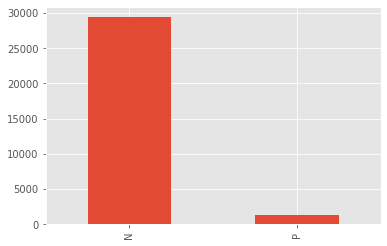

In [0]:
df['ResultValue'].value_counts().plot(kind="bar")

The percentage of negative/positive cases show that the infection rate is relatively small:

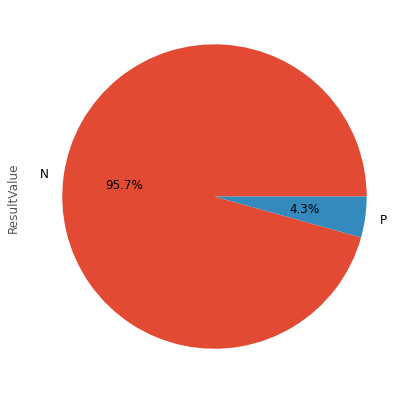

In [0]:
(df['ResultValue'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%',figsize =(7,7), fontsize = 12)

The number of positive cases by age:

[Text(145, 0, ' 145'),
 Text(135, 1, ' 135'),
 Text(135, 2, ' 135'),
 Text(117, 3, ' 117'),
 Text(107, 4, ' 107'),
 Text(95, 5, ' 95'),
 Text(88, 6, ' 88'),
 Text(83, 7, ' 83'),
 Text(73, 8, ' 73'),
 Text(72, 9, ' 72'),
 Text(67, 10, ' 67'),
 Text(56, 11, ' 56'),
 Text(54, 12, ' 54'),
 Text(51, 13, ' 51'),
 Text(19, 14, ' 19'),
 Text(19, 15, ' 19'),
 Text(7, 16, ' 7'),
 Text(2, 17, ' 2')]

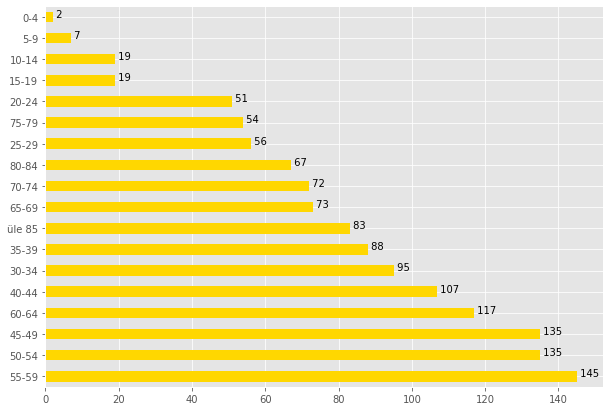

In [0]:
data = df[df['ResultValue'] == 'P']['AgeGroup'].value_counts()

ax = data.plot(kind='barh', figsize=(10,7), color='gold') 
[ax.text(v, i, ' {:}'.format(v)) for i, v in enumerate(data)]

The plot shows that middle-aged and old people are in a risk zone, still the virus affects young people as well.

The number of positive cases by county:

[Text(487, 0, ' 487'),
 Text(423, 1, ' 423'),
 Text(83, 2, ' 83'),
 Text(78, 3, ' 78'),
 Text(75, 4, ' 75'),
 Text(74, 5, ' 74'),
 Text(20, 6, ' 20'),
 Text(19, 7, ' 19'),
 Text(16, 8, ' 16'),
 Text(10, 9, ' 10'),
 Text(8, 10, ' 8'),
 Text(8, 11, ' 8'),
 Text(6, 12, ' 6'),
 Text(6, 13, ' 6'),
 Text(4, 14, ' 4')]

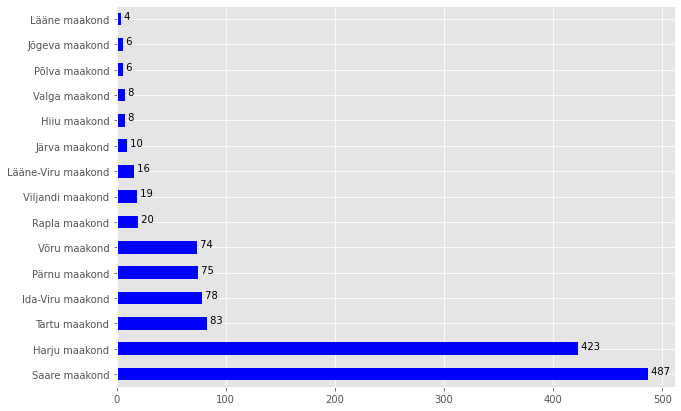

In [0]:
countyData = df[df['ResultValue'] == 'P']['County'].value_counts()

ax = countyData.plot(kind='barh', figsize=(10, 7), color='b') 
[ax.text(v, i, ' {:}'.format(v)) for i, v in enumerate(countyData)]

As it is already known, higher risk areas are Harju maakond and Saare maakond.

Besides, there are about 1.2% of foreign patients or the ones with unknown country of residence:

In [0]:
df['Country'].value_counts()*100.0 /len(df)

Eesti       98.812854
Tundmatu     0.748065
Välismaa     0.439082
Name: Country, dtype: float64

Further, you can see the division by gender:

[Text(0, 0, 'Female negative'),
 Text(0, 0, 'Male negative'),
 Text(0, 0, 'Female positive'),
 Text(0, 0, 'Male positive')]

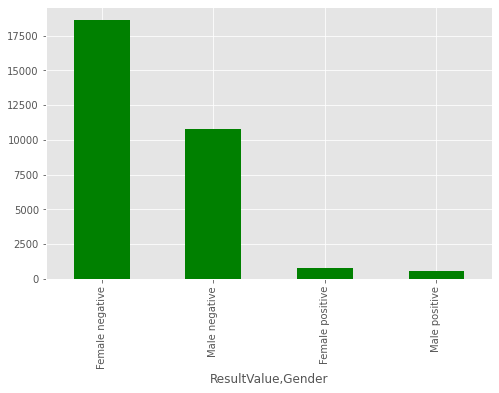

In [0]:
ax = (df.groupby('ResultValue')['Gender'].value_counts()).plot(kind='bar', figsize=(8,5), color='g')
labels = ['Female negative','Male negative','Female positive','Male positive']
ax.set_xticklabels(labels)

This leads to a hypothesis, that women are a bit more likely to get infected. Nevertheless, the difference between Female positive and Male positive is not that big.

# About the dates

For the following observations, time is not a significant field, we will only focus on dates, so I will transform the field as following

In [0]:
df['ResultTime'] = pd.to_datetime(df['ResultTime']).dt.date

The following plot shows the percentage of positive cases by month. It seems that numbers are still increasing

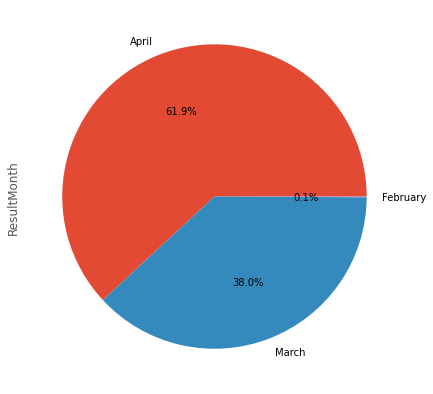

In [0]:
# I've created an additional column which respresents the month when the result took place
df['ResultMonth'] = pd.DatetimeIndex(df['ResultTime']).month
(df[df['ResultValue'] == 'P']['ResultMonth'].value_counts()*100.0 /len(df)).plot.pie(labels=['April','March','February'], autopct='%.1f%%', figsize=(7,7))

So let's see the statistics for each month:

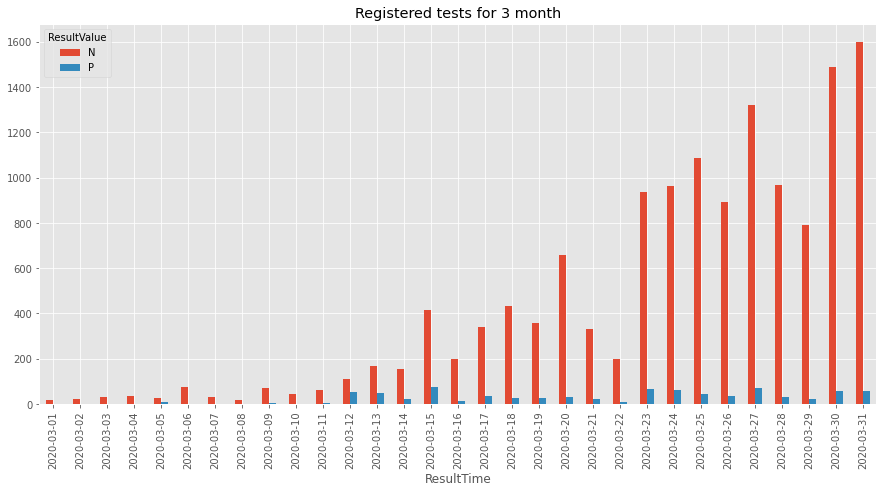

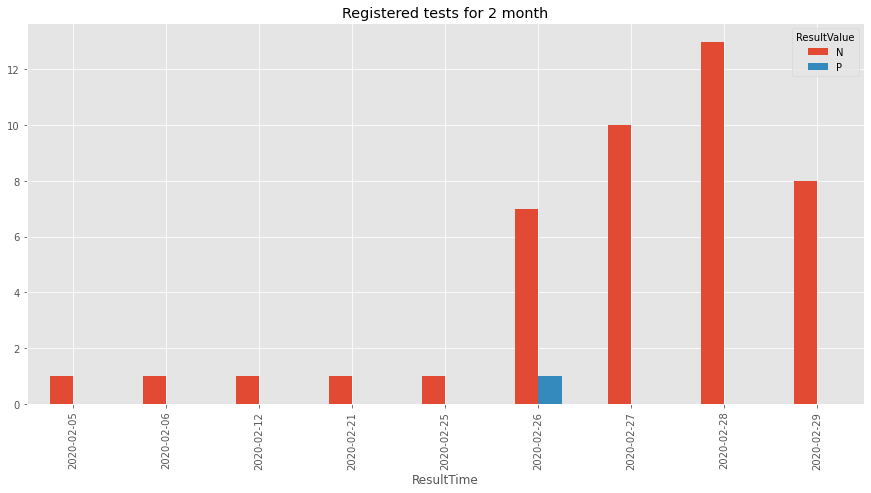

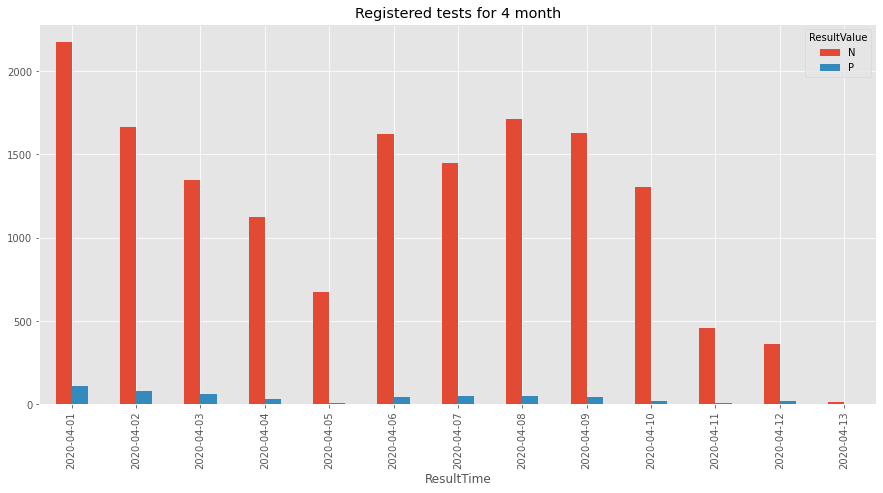

In [0]:
for i in df['ResultMonth'].unique():
  (df[df['ResultMonth'] == i]).groupby(['ResultTime', 'ResultValue'])["ResultTime"].count().unstack().plot(kind="bar", figsize=(15,7))
  title = "Registered tests for %d month" % i
  plt.title(title)

It may be seen one more time that the numbers of positive results are much smaller than negative ones.

The first Coronavirus case was confirmed on 26nd of February, the second one was on the 5th of March, and the next one happened on the 9th of March, thus the virus has started to spread out almost from the beginning. However, the number of tests increased just after the first confirmation, which means the situation wasn't taken for granted. 

We can also infer that March 30 - April 02 were the days when there was a big number of tests made and a big number of them confirmed positive results. The 1st of April shows the worst results.

Let's take a closer look at numbers: 

Overall tests
 2020-04-01    2288
2020-04-08    1763
2020-04-02    1745
2020-04-09    1670
2020-04-06    1666
2020-03-31    1658
2020-03-30    1544
Name: ResultTime, dtype: int64


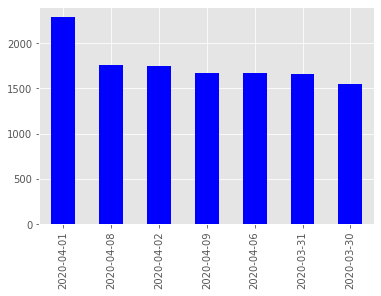


Positive results
 2020-04-01    110
2020-04-02     77
2020-03-15     75
2020-03-27     73
2020-03-23     67
2020-04-03     61
2020-03-24     60
Name: ResultTime, dtype: int64


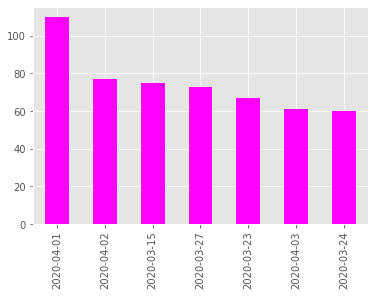

In [0]:
overallTests = df['ResultTime'].value_counts().head(7)
print("Overall tests\n", overallTests)
overallTests.plot(kind='bar', color='b')
plt.show()
positiveTests = df[df['ResultValue'] == 'P']['ResultTime'].value_counts().head(7)
print("\nPositive results\n", positiveTests)
positiveTests.plot(kind='bar', color='magenta')

As mentioned above, the end of March and beginning of April were the toughest so far. 

It is interesting to admit that the number of tests increased in April 06 - April 09 as these were the first sunny and warm days in Estonia. Not many of them were confirmed, though.

To sum up
---
It looks like Estonia has managed to avoid a large growth of new cases of Coronavirus and the difference between the number of positive results and the total number of tests is huge. The situation is not so bad compared to other countries. Let's hope it'll become only better.

Although the numbers seem to be smaller than a couple of weeks ago, it is hard to say when the outbreak may end. Besides, the possibility of the virus being brought back to the country remains.

It may be also seen that people of all ages can get a disease and it is early to relax yet. So stay safe and take care of your physical and mental health:) Thank you for your attention!